In [91]:
import numpy as np
import matplotlib.pyplot as plt
import skimage.feature as feat
import skimage.data as data
from skimage import io, util
import skimage.color as color
import matplotlib.pyplot as plt

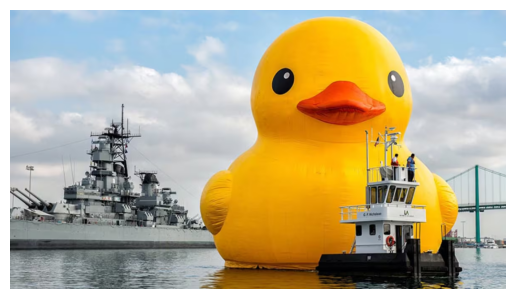

In [92]:
img = io.imread('images/test/giant-rubber-duck.avif')
#img = io.imread('images/board.jpg')
plt.imshow(util.img_as_ubyte(img)); 
plt.axis('off'); 
plt.show()

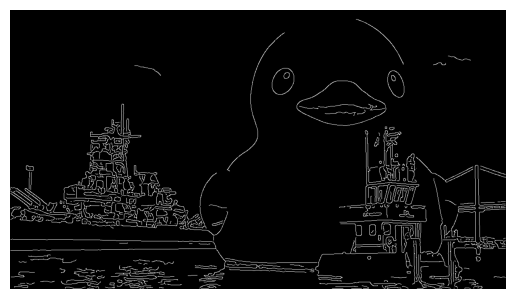

In [93]:
gray_image = color.rgb2gray(img)
# low_threshold and high_threshold defaults are .1 and .2 respectively.
edges = feat.canny(gray_image, low_threshold=.1, high_threshold=0.2, sigma=2)
plt.axis('off')
plt.imshow(edges, cmap='gray')

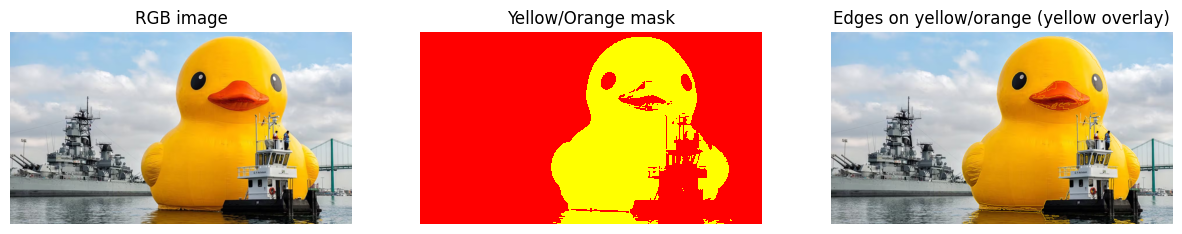

In [94]:
# Edge detection only on yellow/orange objects (visualize mask as purple on black)
# Ensure img is loaded
try:
    img
except NameError:
    from skimage import io
    img = io.imread('images/board.jpg')

# Ensure RGB
if img.ndim == 2:
    img_rgb = color.gray2rgb(img)
else:
    img_rgb = img

# Convert RGB to HSV to threshold yellow/orange
from skimage.color import rgb2hsv
hsv = rgb2hsv(img_rgb)
H = hsv[..., 0]
S = hsv[..., 1]
V = hsv[..., 2]

# Define hue ranges for yellow/orange (approx): yellow ~ 0.10-0.17, orange ~0.04-0.10
# We'll accept a broader band to include both
mask = ((H >= 0.04) & (H <= 0.17)) & (S >= 0.4) & (V >= 0.3)

# Mask the grayscale image and run Canny on masked area
gray = color.rgb2gray(img_rgb)
# Set non-masked areas to 0 to avoid edges there
gray_masked = gray * mask
edges = feat.canny(gray_masked, low_threshold=0.05, high_threshold=0.15, sigma=2)

# Create overlay: yellow edges on the RGB image
overlay = util.img_as_ubyte(img_rgb.copy())
overlay[edges] = [255, 200, 0]  # yellow/orange color for edges

# Display with mask shown as purple on black
from matplotlib.colors import ListedColormap
purple_cmap = ListedColormap(['#FF0000', '#FFFF00'])  # black background, yellow for mask

fig, axes = plt.subplots(1, 3, figsize=(15,5))
axes[0].imshow(util.img_as_ubyte(img_rgb)); axes[0].axis('off'); axes[0].set_title('RGB image')
axes[1].imshow(mask, cmap=purple_cmap, interpolation='nearest'); axes[1].axis('off'); axes[1].set_title('Yellow/Orange mask')
axes[2].imshow(overlay); axes[2].axis('off'); axes[2].set_title('Edges on yellow/orange (yellow overlay)')
plt.show()